In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers


Using TensorFlow backend.


In [2]:
from keras.callbacks import ReduceLROnPlateau, CSVLogger,EarlyStopping,ModelCheckpoint


In [3]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [4]:
images = []
for root, dirnames, filenames in os.walk("Dataset/Resized_train/"):
    for filename in filenames:
        filepath = os.path.join(root, filename)
        image = ndimage.imread(filepath, mode="L")
        images.append(image)

In [5]:
print (images[0].shape)


(216, 64)


In [6]:
labels = np.load('resized_cropped_labeledimages.npy')
labels_list = []
for i in range(len(labels)):
    labels_list.append(labels[i])

In [7]:
print(labels_list[0].shape)

(216, 64)


In [8]:
labels_list[0][0][0]

0.0

In [9]:
train_labels = np.zeros((770,216,64,8))

In [10]:
for i in range(len(labels_list)) :
    for j in range(216) :
        for k in range(64):
            if(labels_list[i][j][k] == 0):
                train_labels[i][j][k][0] = 1
            if(labels_list[i][j][k] == 1):
                train_labels[i][j][k][1] = 1
            if(labels_list[i][j][k] == 2):
                train_labels[i][j][k][2] = 1
            if(labels_list[i][j][k] == 3):
                train_labels[i][j][k][3] = 1
            if(labels_list[i][j][k] == 4):
                train_labels[i][j][k][4] = 1
            if(labels_list[i][j][k] == 5):
                train_labels[i][j][k][5] = 1
            if(labels_list[i][j][k] == 6):
                train_labels[i][j][k][6] = 1
            if(labels_list[i][j][k] == 7):
                train_labels[i][j][k][7] = 1

In [11]:
train_labels.shape

(770, 216, 64, 8)

In [12]:
train_labels[0][0][0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [13]:
images=np.array(images)
print(images.shape[0])
images = images.reshape(images.shape[0],216,64,1)

print(images[0].shape)
train_indices = np.random.choice(770,500,replace = False)
print(sorted(train_indices))
train_images_random = []
train_labels_random = []

for i in train_indices:
    train_images_random.append(images[i])
    train_labels_random.append(train_labels[i])

test_indices = [x for x in range(770) if x not in train_indices]
print(test_indices)
test_images = []
test_labels = []
for i in test_indices:
    test_images.append(images[i])
    test_labels.append(train_labels[i])

770
(216, 64, 1)
[0, 2, 3, 4, 5, 6, 7, 10, 12, 16, 19, 20, 21, 23, 24, 26, 29, 32, 35, 36, 37, 38, 39, 40, 42, 44, 45, 47, 48, 49, 50, 51, 53, 56, 57, 59, 60, 61, 62, 65, 66, 67, 72, 73, 75, 76, 77, 78, 80, 81, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 104, 105, 107, 109, 111, 114, 115, 117, 118, 121, 122, 123, 124, 130, 131, 133, 134, 135, 137, 139, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 171, 172, 173, 174, 177, 178, 180, 182, 184, 185, 186, 187, 189, 190, 191, 193, 194, 196, 197, 198, 200, 204, 205, 206, 209, 210, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 233, 234, 235, 238, 239, 240, 243, 248, 252, 255, 256, 258, 260, 261, 263, 264, 265, 266, 268, 269, 270, 273, 274, 276, 277, 279, 285, 286, 287, 288, 289, 290, 291, 292, 296, 297, 298, 300, 303, 304, 305, 306, 308, 309, 311, 312, 314, 316, 317, 319, 320, 322, 323, 325, 331, 333, 334, 335

In [14]:
train_images = np.array(train_images_random)
train_labels = np.array(train_labels_random)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [15]:
train_images = train_images.astype('float32')
train_labels = train_labels.astype('float32')
test_images = test_images.astype('float32')
test_labels = test_labels.astype('float32')

In [16]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)

(500, 216, 64, 1)
(270, 216, 64, 1)
(500, 216, 64, 8)


In [17]:
print(train_images[0])

[[[ 35.]
  [ 44.]
  [ 38.]
  ..., 
  [ 41.]
  [ 45.]
  [ 36.]]

 [[ 22.]
  [ 26.]
  [ 21.]
  ..., 
  [ 50.]
  [ 52.]
  [ 26.]]

 [[  0.]
  [  0.]
  [  0.]
  ..., 
  [ 48.]
  [ 45.]
  [ 13.]]

 ..., 
 [[ 60.]
  [ 60.]
  [ 57.]
  ..., 
  [ 73.]
  [ 72.]
  [ 65.]]

 [[ 60.]
  [ 52.]
  [ 47.]
  ..., 
  [ 72.]
  [ 68.]
  [ 62.]]

 [[ 60.]
  [ 49.]
  [ 44.]
  ..., 
  [ 67.]
  [ 63.]
  [ 66.]]]


In [17]:
print (len(train_images))
print (len(train_labels))
print (np.array(train_labels).shape)

500
500
(500, 216, 64, 8)


In [18]:
train_images.shape

(500, 216, 64, 1)

In [20]:
len(train_images)

500

In [21]:
data_shape = 216*64

In [22]:
weight_decay = 0.0001

In [23]:
# Defines the input tensor
inputs = Input(shape=(216,64,1))

L1 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(inputs)
L2 = BatchNormalization()(L1)
L2 = Activation('relu')(L2)
#L3 = Lambda(maxpool_1,output_shape = shape)(L2)
L3 = MaxPooling2D(pool_size=(2,2))(L2)
L4 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L3)
L5 = BatchNormalization()(L4)
L5 = Activation('relu')(L5)
#L6 = Lambda(maxpool_2,output_shape = shape)(L5)
L6 = MaxPooling2D(pool_size=(2,2))(L5)
L7 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L6)
L8 = BatchNormalization()(L7)
L8 = Activation('relu')(L8)
#L9 = Lambda(maxpool_3,output_shape = shape)(L8)
L9 = MaxPooling2D(pool_size=(2,2))(L8)
L10 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L9)
L11 = BatchNormalization()(L10)
L11 = Activation('relu')(L11)
L12 = UpSampling2D(size = (2,2))(L11)
#L12 = Lambda(unpool_3,output_shape = unpool_shape)(L11)
L13 = Concatenate(axis = 3)([L8,L12])
L14 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L13)
L15 = BatchNormalization()(L14)
L15 = Activation('relu')(L15)
L16 = UpSampling2D(size= (2,2))(L15)
#L16 = Lambda(unpool_2,output_shape=unpool_shape)(L15)
L17 = Concatenate(axis = 3)([L16,L5])
L18 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L17)
L19 = BatchNormalization()(L18)
L19 = Activation('relu')(L19)
#L20 = Lambda(unpool_1,output_shape=unpool_shape)(L19)
L20 = UpSampling2D(size=(2,2),name = "Layer19")(L19)
L21 = Concatenate(axis=3)([L20,L2])
L22 = Conv2D(64,kernel_size=(3,3),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L21)
L23 = BatchNormalization()(L22)
L23 = Activation('relu')(L23)
L24 = Conv2D(8,kernel_size=(1,1),padding = "same",kernel_regularizer=regularizers.l2(weight_decay))(L23)
L = Reshape((data_shape,8),input_shape = (216,64,8))(L24)
L = Activation('softmax')(L)
model = Model(inputs = inputs, outputs = L)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 216, 64, 1)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 216, 64, 64)       640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 216, 64, 64)       256       
_________________________________________________________________
activation_1 (Activation)    (None, 216, 64, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 108, 32, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 32, 64)       36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 32, 64)       256       
__________

In [24]:
weights = np.load('weighted_cropped_images.npy')

In [25]:
weights.shape

(770, 216, 64)

In [26]:
weights[0][0][0]

1.0

In [27]:
np.unique(weights)

array([  1.   ,   4.336,   6.63 ,  12.007,  12.459,  14.647,  15.368,
        17.978,  19.336,  21.63 ,  27.007,  27.459,  29.647,  30.368,
        32.978])

In [28]:
weights_matrix = []
for i in train_indices:
    weights_matrix.append(weights[i])

In [29]:
sample_weights = np.array(weights_matrix)

In [30]:
sample_weights = np.reshape(sample_weights,(500,data_shape))

In [31]:
sample_weights.shape

(500, 13824)

In [32]:
len(train_images)

500

In [33]:
train_labels.shape

(500, 216, 64, 8)

In [34]:
train_labels = np.reshape(train_labels,(500,data_shape,8))
test_labels = np.reshape(test_labels,(270,data_shape,8))

In [35]:
train_labels.shape

(500, 13824, 8)

In [406]:
count = np.zeros(8)

In [407]:
for i in range(500):
    for j in range(13824):
        for k in range(8):
            if(train_labels[i][j][k]==1):
                count[k] = count[k]+1

In [408]:
for i in range(8):
    print(count[i])

3972411.0
312782.0
605075.0
341224.0
263099.0
920815.0
274885.0
221709.0


In [409]:
count

array([ 3972411.,   312782.,   605075.,   341224.,   263099.,   920815.,
         274885.,   221709.])

In [410]:
median = np.median(count)

In [411]:
median

327003.0

In [364]:
scale = np.zeros(8)

In [367]:
for i in range(8):
    scale[i] = (median/count[i])

In [368]:
scale

array([ 0.08176891,  1.01882538,  0.54272503,  0.98185769,  1.25668549,
        0.354605  ,  1.19773269,  1.47007454])

In [369]:
weights = np.zeros(8)
for i in range(8):
    weights[i] = scale[i]/scale[0]

In [370]:
weights

array([  1.        ,  12.45981304,   6.63730261,  12.00771353,
        15.36874386,   4.33667245,  14.6477755 ,  17.97840371])

In [36]:
smooth = 1

In [37]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


In [38]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [39]:
def customized_loss(y_true,y_pred):
    return (1*K.categorical_crossentropy(y_true, y_pred))+(0.5*dice_coef_loss(y_true, y_pred))

In [40]:
optimiser = optimizers.Adam(lr = 0.001)

In [41]:
model.compile(optimizer=optimiser,loss=customized_loss,metrics=['accuracy',dice_coef],sample_weight_mode='temporal')

In [42]:
train_images[0].shape

(216, 64, 1)

In [43]:
#Defining Callback functions which will be called by model during runtime when specified condition satisfies
lr_reducer = ReduceLROnPlateau(factor=0.5, cooldown=0, patience=6, min_lr=0.5e-6)
csv_logger = CSVLogger('Relaynet_sample_weights5.csv')
model_chekpoint = ModelCheckpoint("Relaynet_sample_weights5.hdf5",monitor = 'val_loss',verbose = 1,save_best_only=True)

In [44]:

model.fit(train_images,train_labels,batch_size=20,epochs=200,validation_data=(test_images,test_labels),sample_weight=sample_weights,callbacks=[lr_reducer, csv_logger,model_chekpoint])

Train on 500 samples, validate on 270 samples
Epoch 1/200
500/500 [==============================] - 64s - loss: 67.3559 - acc: 0.4229 - dice_coef: 0.3733 - val_loss: 15.2831 - val_acc: 0.0517 - val_dice_coef: 0.0531
Epoch 2/200
500/500 [==============================] - 52s - loss: 62.2564 - acc: 0.4505 - dice_coef: 0.4273 - val_loss: 13.7475 - val_acc: 0.1853 - val_dice_coef: 0.1456
Epoch 3/200
500/500 [==============================] - 52s - loss: 60.2845 - acc: 0.4396 - dice_coef: 0.4278 - val_loss: 11.1649 - val_acc: 0.3235 - val_dice_coef: 0.3011
Epoch 4/200
500/500 [==============================] - 52s - loss: 59.7140 - acc: 0.4319 - dice_coef: 0.4257 - val_loss: 10.8776 - val_acc: 0.3317 - val_dice_coef: 0.3184
Epoch 5/200
500/500 [==============================] - 52s - loss: 59.5044 - acc: 0.4296 - dice_coef: 0.4244 - val_loss: 9.9306 - val_acc: 0.3863 - val_dice_coef: 0.3754
Epoch 6/200
500/500 [==============================] - 52s - loss: 58.8895 - acc: 0.4188 - dice_coef

In [93]:
testing_image = train_images[96]

In [94]:
testing_image.shape

(216, 64, 1)

In [95]:
testing_image = np.squeeze(testing_image,axis = 2)

In [96]:
testing_image.shape

(216, 64)

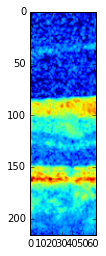

In [97]:
plt.imshow(testing_image)

In [98]:
plt.show()

In [99]:
testing_image = testing_image.reshape((1,216,64,1))

In [100]:
prediction = model.predict(testing_image)

In [101]:
prediction = np.squeeze(prediction,axis = 0)

In [102]:
print(prediction.shape)


(13824, 8)


In [103]:
np.argmax(prediction[6999])

3

In [104]:
prediction = np.reshape(prediction,(216,64,8))

In [105]:
output = np.zeros((216,64))

In [106]:
ground = np.zeros((216,64))

In [107]:
for i in range(216):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [108]:
test_labels[0].shape

(13824, 8)

In [109]:
test_labels[250][6999]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.], dtype=float32)

In [111]:
test_ground_truth = np.reshape(train_labels[96],(216,64,8))

In [112]:
for i in range(216):
    for j in range(64):
        index = np.argmax(test_ground_truth[i][j])
        ground[i][j] = index

In [113]:
for i in range(216):
    for j in range(64):
        index = np.argmax(prediction[i][j])
        output[i][j] = index

In [114]:
print (output.shape)

(216, 64)


In [115]:
color= np.zeros((216,64,3))

In [116]:
c0 = 0
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
c6 = 0
c7 = 0

In [117]:
for j in range(216):
    for k in range(64):
        if(output[j][k]==0):
            c0 = c0 + 1
            color[j][k] = [0,0,0]
        if(output[j][k]==1):
            c1 = c1 + 1
            color[j][k] = [128,0,0]
        if(output[j][k]==2):
            c2 = c2 + 1
            color[j][k] = [0,128,0]
        if(output[j][k]==3):
            c3 = c3 + 1
            color[j][k] = [128,128,0] 
        if(output[j][k]==4):
            c4 = c4 + 1
            color[j][k] = [0,128,128]
        if(output[j][k]==5):
            c5 = c5 + 1
            color[j][k] = [64,0,0]
        if(output[j][k]==6):
            c6 = c6 + 1
            color[j][k] = [192,0,0]
        if(output[j][k]==7):
            c7 = c7 + 1
            color[j][k] = [64,128,0]

In [118]:
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)
print(c7)


5349
2898
0
1008
824
2165
928
652


In [119]:
%matplotlib inline

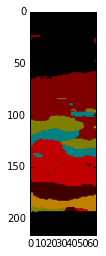

In [120]:
plt.imshow(color)

In [121]:
plt.show()

In [122]:
imsave("results2.png",color)

In [123]:
%matplotlib inline

In [124]:
plt.show()

In [125]:
color= np.zeros((216,64,3))

In [126]:
c0 = 0
c1 = 0
c2 = 0
c3 = 0
c4 = 0
c5 = 0
c6 = 0
c7 = 0

In [127]:
for j in range(216):
    for k in range(64):
        if(ground[j][k]==0):
            c0 = c0 + 1
            color[j][k] = [0,0,0]
        if(ground[j][k]==1):
            c1 = c1 + 1
            color[j][k] = [128,0,0]
        if(ground[j][k]==2):
            c2 = c2 + 1
            color[j][k] = [0,128,0]
        if(ground[j][k]==3):
            c3 = c3 + 1
            color[j][k] = [128,128,0] 
        if(ground[j][k]==4):
            c4 = c4 + 1
            color[j][k] = [0,128,128]
        if(ground[j][k]==5):
            c5 = c5 + 1
            color[j][k] = [64,0,0]
        if(ground[j][k]==6):
            c6 = c6 + 1
            color[j][k] = [192,0,0]
        if(ground[j][k]==7):
            c7 = c7 + 1
            color[j][k] = [64,128,0]

In [128]:
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)
print(c7)


7653
338
921
696
538
2597
652
429


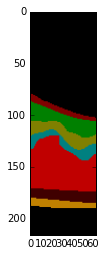

In [129]:
plt.imshow(color)

In [322]:
imsave("results.png",color)

In [134]:
plt.show()